# Aplicaciones de redes neuronales a datos tabulares

Hecho por:

- Wesly Zamira Huertas Salinas

- Juan Pablo Muñoz Jimenez

- Alejandro Torrado Calderon

## Introducción

El análisis del riesgo crediticio es esencial para que las instituciones financieras gestionen de manera efectiva su exposición al incumplimiento. Anticipar la probabilidad de que un individuo no cumpla con sus obligaciones financieras permite tomar decisiones más precisas en la concesión de créditos y diseñar estrategias de mitigación de riesgo. En este trabajo, se busca desarrollar un modelo predictivo basado en redes neuronales artificiales que estime la probabilidad de incumplimiento, utilizando como variable objetivo "loan_status" del Credit Risk Dataset disponible en Kaggle. Además de optimizar la arquitectura del modelo, se pretende representar sus resultados mediante una scorecard interpretable, que facilite la comprensión del riesgo asociado a distintos perfiles crediticios.

El proyecto también incluye un análisis exhaustivo de las variables que más influyen en el nivel de riesgo de una persona, aportando transparencia y valor explicativo al modelo. Como complemento, se desarrollará una aplicación web interactiva que permitirá a los usuarios conocer su scorecard personalizado y visualizar cómo su perfil se compara con el resto de la población. Este enfoque integral combina el uso de técnicas avanzadas de machine learning, análisis interpretativo y herramientas de visualización, con el objetivo de ofrecer una solución robusta y accesible para la evaluación del riesgo crediticio.

## Descripción del problema

El crédito al consumo y los préstamos personales conllevan riesgos inherentes asociados a la probabilidad de que un cliente incurra en incumplimiento de sus obligaciones de pago. La predicción temprana de este riesgo es fundamental para que las entidades financieras puedan tomar decisiones informadas sobre la concesión de crédito, ajustar sus políticas de riesgo, y diseñar estrategias personalizadas de mitigación (Hand & Henley, 1997; Lessmann et al., 2015).

En este contexto, los avances recientes en técnicas de aprendizaje automático y, en particular, en redes neuronales artificiales (ANN), ofrecen nuevas oportunidades para mejorar la capacidad predictiva de los modelos tradicionales de riesgo de crédito. A través de arquitecturas profundas, estos modelos pueden capturar relaciones no lineales y complejas entre las características del cliente y su probabilidad de default (Lessmann et al., 2015).

El objetivo de este proyecto es múltiple:

* Desarrollar un modelo de predicción de la probabilidad de incumplimiento (default) basado en técnicas de aprendizaje profundo, específicamente redes neuronales artificiales.

* Representar las salidas del modelo mediante una scorecard interpretable, que permita asignar un score de riesgo comprensible a cada cliente y facilite su uso en la toma de decisiones crediticias.

* Identificar y analizar las variables más relevantes que inciden en el riesgo de incumplimiento, promoviendo aquí una mejor comprensión del perfil de riesgo de los clientes.

* Desplegar los resultados a de una aplicación web interactiva, que permita a los usuarios consultar su score personal y visualizar su información de perfil de riesgo frente a la población general.


## Metodología

La primera etapa del proyecto consiste en el análisis descriptivo de los datos. Se empleará un dataset compuesto por registros históricos de préstamos, que incluirá variables demográficas, socioeconómicas y crediticias de los solicitantes disponible en (Credit Risk Analysis, 2021). La variable objetivo será loan_status, de la que se generará una nueva variable (loan_status_binary) que toma el valor de 0 para casos sin incumplimiento y 1 para casos con incumplimiento. Como variables predictoras se considerarán variables financieras, de comportamiento y demográficas, tales como los ingresos anuales, el saldo en tarjetas de crédito, el número de cuentas abiertas y el ratio de utilización del crédito, entre otras.

Durante el preprocesamiento, se imputarán los valores faltantes utilizando técnicas apropiadas para cada tipo de variable. Posteriormente, se aplicará la normalización o estandarización de las variables numéricas, con el fin de garantizar la homogeneidad de las escalas. Las variables categóricas se codificarán mediantela técnica One-Hot Encoding. Finalmente, el dataset se dividirá en tres subconjuntos: entrenamiento, validación y prueba, para garantizar una adecuada evaluación del modelo.

En la fase de modelado, se construyeron y evaluaron dos arquitecturas de redes neuronales artificiales (ANN) implementadas en PyTorch. El primer modelo, denominado CreditRiskNN, consistió en una red secuencial compuesta por una capa de entrada seguida de dos capas ocultas de 64 y 32 neuronas respectivamente, con activaciones ReLU y regularización mediante Dropout (0.3 y 0.2). La capa de salida empleó una función de activación Sigmoid para producir probabilidades de incumplimiento. Este modelo fue entrenado utilizando el optimizador Adam y evaluado con métricas estándar del campo de la predicción de riesgo crediticio.

El segundo modelo, denominado CreditRiskNNV2, fue diseñado con una arquitectura más profunda y robusta. Incluyó capas de 128, 64 y 32 neuronas, intercaladas con capas de Batch Normalization que permiten acelerar el entrenamiento y mejorar la estabilidad del modelo. Además, se aplicó una estrategia de Dropout progresivo (0.4, 0.3 y 0.2) para reforzar la regularización y prevenir el sobreajuste. Al igual que en el modelo anterior, la capa de salida utilizó una activación Sigmoid y el entrenamiento se realizó con el optimizador Adam. La evaluación de ambos modelos se llevó a cabo mediante métricas como AUC-ROC, Accuracy, F1-Score y matriz de confusión, permitiendo comparar su capacidad para distinguir entre clientes cumplidos e incumplidos.

Posteriormente, se desarrolló una scorecard que transforma las probabilidades de incumplimiento generadas por los modelos en un score interpretable, en un rango comprendido entre 300 y 850 puntos.

Finalmente, los resultados del proyecto fueron integrados en una aplicación web interactiva desarrollada con Streamlit. La aplicación permite a los usuarios ingresar sus datos personales y financieros, visualizar su score crediticio estimado y comparar su perfil frente a la población general. Esta herramienta fue desplegada en la nube, lo que facilita su accesibilidad y potencial aplicación en entornos reales.

## Análisis descriptivo

In [1]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# First install the kagglehub package using pip
!pip install kagglehub

# Then import and use kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ranadeep/credit-risk-dataset")

print("Path to dataset files:", path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 11.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 101M/101M [00:00<00:00, 186MB/s] Extracting files...

Path to dataset files: /root/.cache/kagglehub/datasets/ranadeep/credit-risk-dataset/versions/3


In [3]:
loan_dir = os.path.join(path, 'loan')

# Get the list of files directly from os.listdir() instead of using undefined variable
files_in_loan = os.listdir(loan_dir)


csv_path = os.path.join(loan_dir, files_in_loan[0])  # Assuming the CSV is the first (and possibly only) file

data = pd.read_csv(csv_path)

/tmp/ipykernel_96/3925979419.py:9: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_path)


En la Tabla 1 se presentan algunos de los datos contenidos en la base de datos que se utilizará para el desarrollo del modelo predictivo. Este conjunto de datos, obtenido del Credit Risk Dataset de Kaggle, proporciona información detallada sobre diversos atributos demográficos, financieros y crediticios de los individuos. La variable objetivo del análisis es "loan_status", que indica si un individuo ha incumplido o no con el pago de sus obligaciones financieras. Esta variable se utilizará como etiqueta durante el proceso de entrenamiento y validación del modelo de redes neuronales artificiales.

In [4]:
print("Tabla 1: Dataset")
data.sample(10, random_state=0)

Tabla 1: Dataset


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
372989,18495457,20658106,6600.0,6600.0,6600.0,36 months,9.17,210.41,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,16300.0,NaN,NaN,NaN
9769,844228,1055134,4000.0,4000.0,4000.0,36 months,5.99,121.67,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134461,4776507,6048758,9450.0,9450.0,9450.0,36 months,10.16,305.64,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,18900.0,NaN,NaN,NaN
425772,12956062,13668371,7200.0,7200.0,7200.0,36 months,12.99,242.57,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,NaN,NaN
409080,12386195,14398340,18000.0,18000.0,18000.0,60 months,14.64,424.83,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,16100.0,NaN,NaN,NaN
492376,66424073,71159884,20000.0,20000.0,19950.0,36 months,11.99,664.20,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,30300.0,NaN,NaN,NaN
882836,38474190,41267907,3600.0,3600.0,3600.0,36 months,16.49,127.44,D,D3,...,NaN,NaN,NaN,NaN,NaN,NaN,3800.0,NaN,NaN,NaN
710805,52486267,55975984,30000.0,30000.0,30000.0,60 months,12.69,677.85,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,27300.0,NaN,NaN,NaN
550087,63289020,67530845,25000.0,25000.0,25000.0,36 months,7.89,782.15,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,96900.0,NaN,NaN,NaN
561374,62964655,67300382,7000.0,7000.0,7000.0,36 months,5.32,210.81,A,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,21100.0,NaN,NaN,NaN


### Descripción de variables del dataset

- `addr_state`: Estado proporcionado por el solicitante en la solicitud de crédito.
- `annual_inc`: Ingreso anual autodeclarado por el solicitante durante el registro.
- `annual_inc_joint`: Ingreso anual combinado autodeclarado por los co-solicitantes.
- `application_type`: Tipo de solicitud de crédito (individual o conjunta).
- `collection_recovery_fee`: Cargos por recuperación después de la cancelación.
- `collections_12_mths_ex_med`: Número de cobros en los últimos 12 meses, excluyendo cobros médicos.
- `delinq_2yrs`: Número de incidentes de morosidad de más de 30 días en los últimos 2 años.
- `desc`: Descripción del crédito proporcionada por el solicitante.
- `dti`: Ratio de deuda sobre ingreso mensual del solicitante.
- `dti_joint`: Ratio de deuda sobre ingreso mensual de los co-solicitantes.
- `earliest_cr_line`: Fecha de apertura de la primera línea de crédito del solicitante.
- `emp_length`: Antigüedad laboral en años.
- `emp_title`: Título del puesto laboral del solicitante.
- `fico_range_high` / `fico_range_low`: Rango de puntuación FICO en el momento de originación del crédito.
- `funded_amnt` / `funded_amnt_inv`: Monto total comprometido para el crédito (total e inversores).
- `grade`: Calificación del crédito asignada por Lending Club.
- `home_ownership`: Situación de propiedad de vivienda del solicitante (alquiler, propiedad, hipoteca, otro).
- `id`: Identificador único del listado de crédito.
- `initial_list_status`: Estado inicial de listado del crédito.
- `inq_last_6mths`: Número de consultas de crédito en los últimos 6 meses (excluyendo auto/hipoteca).
- `installment`: Pago mensual del crédito.
- `int_rate`: Tasa de interés del crédito.
- `is_inc_v`: Estado de verificación del ingreso.
- `issue_d`: Mes de emisión del crédito.
- `last_credit_pull_d`: Fecha de la última consulta de crédito.
- `last_fico_range_high` / `last_fico_range_low`: Rango de puntuación FICO más reciente.
- `last_pymnt_amnt`: Último monto de pago recibido.
- `last_pymnt_d`: Fecha del último pago recibido.
- `loan_amnt`: Monto solicitado originalmente para el crédito.
- `loan_status`: Estado actual del crédito (variable objetivo).
- `member_id`: Identificador único del miembro solicitante.
- `mths_since_last_delinq`: Meses desde la última morosidad.
- `mths_since_last_major_derog`: Meses desde la última calificación grave (90 días o peor).
- `mths_since_last_record`: Meses desde el último registro público.
- `next_pymnt_d`: Fecha del próximo pago programado.
- `open_acc`: Número de líneas de crédito abiertas.
- `out_prncp` / `out_prncp_inv`: Principal pendiente (total e inversores).
- `policy_code`: Código de política de producto.
- `pub_rec`: Número de registros públicos negativos.
- `purpose`: Propósito declarado para el crédito.
- `pymnt_plan`: Indica si hay un plan de pago acordado.
- `recoveries`: Recuperaciones después de la cancelación.
- `revol_bal`: Saldo de crédito rotativo.
- `revol_util`: Utilización de línea de crédito rotativa.
- `sub_grade`: Subgrado de calificación del crédito.
- `term`: Plazo del crédito en meses (36 o 60).
- `title`: Título del crédito proporcionado por el solicitante.
- `total_acc`: Número total de líneas de crédito en el historial.
- `total_pymnt` / `total_pymnt_inv`: Pagos totales recibidos (total e inversores).
- `total_rec_int`: Intereses recibidos a la fecha.
- `total_rec_late_fee`: Cargos por pagos atrasados recibidos.
- `total_rec_prncp`: Principal recibido a la fecha.
- `url`: URL del listado del crédito en Lending Club.
- `verified_status_joint`: Estado de verificación de ingreso de co-solicitantes.
- `zip_code`: Primeros 3 dígitos del código postal del solicitante.

#### Variables adicionales relacionadas con líneas de crédito abiertas y morosidad:

- `open_acc_6m`: Número de líneas abiertas en los últimos 6 meses.
- `open_il_6m`: Número de créditos a plazos activos actualmente.
- `open_il_12m` / `open_il_24m`: Número de créditos a plazos abiertos en los últimos 12/24 meses.
- `mths_since_rcnt_il`: Meses desde la apertura más reciente de crédito a plazos.
- `total_bal_il`: Saldo actual total de créditos a plazos.
- `il_util`: Ratio de utilización de créditos a plazos.
- `open_rv_12m` / `open_rv_24m`: Número de créditos rotativos abiertos en los últimos 12/24 meses.
- `max_bal_bc`: Máximo saldo actual en créditos rotativos.
- `all_util`: Ratio de saldo total a límite de crédito en todas las líneas.
- `total_rev_hi_lim`: Límite de crédito rotativo total disponible.
- `inq_fi`: Número de consultas de crédito para financiamiento personal.
- `total_cu_tl`: Número de líneas de financiamiento.
- `inq_last_12m`: Consultas de crédito en los últimos 12 meses.
- `acc_now_delinq`: Número de cuentas actualmente en morosidad.
- `tot_coll_amt`: Monto total en cobranza.
- `tot_cur_bal`: Saldo actual total en todas las cuentas.


### Preprocesamiento

Primero, se define un diccionario llamado status_map, que asigna valores numéricos a las distintas categorías de la variable loan_status. Las categorías que representan créditos pagados en su totalidad se codifican como 0 (cumplidos), mientras que aquellas que indican morosidad o incumplimiento se codifican como 1 (incumplidos). A partir de este mapeo, se crea una nueva columna llamada loan_status_binary que contiene la versión codificada de la variable objetivo.

In [5]:
# 2. Codificar la variable objetivo 'loan_status' creando un diccionario "status_map"

status_map = {
    'Fully Paid': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Charged Off': 1,
    'Default': 1,
    'Does not meet the credit policy. Status:Charged Off': 1,
    'Late (31-120 days)': 1
}
data['loan_status_binary'] = data['loan_status'].map(status_map)


#--------- Se crea la nueva variable loan_status_binary -----------------------


Luego, se eliminan del dataset aquellas observaciones que no tienen un valor definido en loan_status_binary (es decir, registros que no fueron mapeados o que tienen valores faltantes en loan_status). Esto garantiza que el modelo solo se entrene con ejemplos claramente etiquetados, evitando la introducción de ruido o ambigüedad.

In [6]:
'''
Se aplica el mapeo y se crea una nueva columna, loan_status_binary, con la codificación deseada.
'''

# 3. Eliminar los casos sin etiqueta (valor NA) en la variable objetivo

#Garantiza que solo se trabaje con registros cuya clasificación (bueno/malo) se conoce con certeza, evitando introducir ruido o casos ambiguos en la etapa de modelado.

data = data.dropna(subset=['loan_status_binary'])

A continuación, se imprime un resumen inicial del dataset procesado:

- Las dimensiones actuales del dataset (número de registros y columnas).

- La distribución de las clases en la variable objetivo (loan_status_binary), mostrando el conteo de registros cumplidos e incumplidos.

- El porcentaje de valores faltantes por columna, ordenado de mayor a menor.

- Los tipos de datos de cada columna.

In [7]:
# 4. Mostrar resumen inicial del dataset

'''
- Se imprime la dimensión del dataset (número de registros y columnas).

-Se muestra la distribución (conteo) de los valores de loan_status_binary.

-Se presenta un vistazo a las primeras filas para entender la estructura y contenido.

-Se muestra los tipos de datos y el porcentaje de valores faltantes en cada columna.
'''
print(f"Dimensiones del dataset filtrado: {data.shape}")
print("Distribución de la variable objetivo:")
print(data['loan_status_binary'].value_counts())

Dimensiones del dataset filtrado: (268530, 75)
Distribución de la variable objetivo:
loan_status_binary
0.0    209711
1.0     58819
Name: count, dtype: int64


In [8]:
print("\nTipos de variables:")
print(data.dtypes)

print("\nValores faltantes por columna:")
print(data.isnull().mean().sort_values(ascending=False) * 100)


Tipos de variables:
id                      int64
member_id               int64
loan_amnt             float64
funded_amnt           float64
funded_amnt_inv       float64
                       ...   
total_rev_hi_lim      float64
inq_fi                float64
total_cu_tl           float64
inq_last_12m          float64
loan_status_binary    float64
Length: 75, dtype: object

Valores faltantes por columna:
verification_status_joint    99.998883
annual_inc_joint             99.998883
dti_joint                    99.998883
il_util                      99.953078
mths_since_rcnt_il           99.947864
                               ...    
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
id                            0.000000
loan_status_binary            0.000000
Length: 75, dtype: float64


En la Figura 1 se presenta la distribución de la variable objetivo:

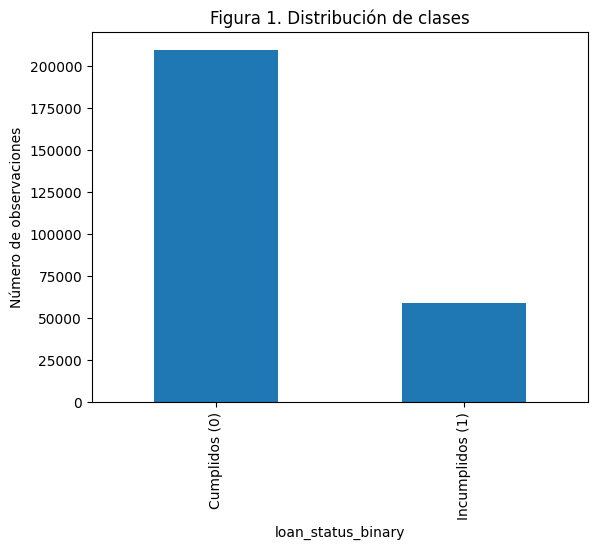

In [9]:
# Visualización de la distribución de la variable objetivo
#Genera una gráfica de barras que ilustra la cantidad de registros en cada clase (buenos 0 y malos pagadores 1).
data['loan_status_binary'].value_counts().plot(kind='bar', title='Figura 1. Distribución de clases')
plt.xticks([0, 1], ['Cumplidos (0)', 'Incumplidos (1)'])
plt.ylabel('Número de observaciones')
plt.show()

En esta sección se realiza una limpieza de columnas del dataset con el fin de eliminar aquellas que aportan poco valor al modelo o que podrían introducir problemas como overfitting o fugas de información.

In [10]:
# Limpieza de columnas y eliminación de variables irrelevantes

# 1. Eliminar columnas con un promedio >75% de valores faltantes
missing_threshold = 0.75
cols_to_drop = data.columns[data.isnull().mean() > missing_threshold].tolist()

# 2. Agregar columnas irrelevantes manualmente

'''
Se añaden de forma manual columnas que, aunque no cumplan el criterio de datos faltantes
 son irrelevantes o pueden generar fugas de información/ruido ya que no contiene información
 **predictiva** y si se deja podría agregar overfitting
 (por ejemplo, identificadores o variables que se conocen solo después del incumplimiento).
'''
cols_to_drop += ['id', 'member_id', 'loan_status', 'recoveries', 'collection_recovery_fee',    'funded_amnt',
    'funded_amnt_inv',
    'installment',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'last_pymnt_amnt',
    'revol_bal',             # Puedes eliminar esta o 'total_rev_hi_lim', no ambas
    'out_prncp_inv'
]
# 3. Eliminar duplicados en la lista de columnas a eliminar
# Garantizando que el dataset queda libre de columnas redundantes o irrelevantes, simplificando futuras transformaciones y el modelado.
cols_to_drop = list(set(cols_to_drop))

# 4. Eliminar las columnas identificadas
data_cleaned = data.drop(columns=cols_to_drop)
# Muestra el nombre de las columnas eliminadas, la cantidad y la dimensión del dataset
print (cols_to_drop)
print(f"\nColumnas eliminadas: {len(cols_to_drop)}")
print(f"Dimensiones finales tras eliminación: {data_cleaned.shape}")

['id', 'total_cu_tl', 'recoveries', 'member_id', 'inq_last_12m', 'total_pymnt_inv', 'open_il_12m', 'max_bal_bc', 'verification_status_joint', 'open_rv_12m', 'dti_joint', 'revol_bal', 'next_pymnt_d', 'open_il_6m', 'mths_since_rcnt_il', 'funded_amnt_inv', 'last_pymnt_amnt', 'open_acc_6m', 'annual_inc_joint', 'open_il_24m', 'total_pymnt', 'il_util', 'collection_recovery_fee', 'open_rv_24m', 'out_prncp_inv', 'funded_amnt', 'installment', 'inq_fi', 'total_rec_int', 'loan_status', 'mths_since_last_major_derog', 'total_bal_il', 'mths_since_last_record', 'all_util']

Columnas eliminadas: 34
Dimensiones finales tras eliminación: (268530, 41)


A continuación, se reemplazan los valores faltantes de las variables numéricas del dataset `data_cleaned`. Primero, se identifican las columnas numéricas (tipos `int64` y `float64`), excluyendo la variable objetivo `loan_status_binary` para no alterar la variable que se desea predecir. Luego, se utiliza `SimpleImputer` con la estrategia de la mediana para reemplazar los valores faltantes: para cada columna numérica, se calcula su mediana y se utiliza este valor para imputar los registros que contienen valores nulos. Esta estrategia es robusta frente a valores atípicos y garantiza que el dataset quede completamente libre de valores faltantes en sus variables numéricas, lo cual es un requisito fundamental para el entrenamiento de redes neuronales. Finalmente, se verifica que no queden valores nulos en las columnas numéricas tras la imputación.


In [11]:
# Imputación de valores faltantes

from sklearn.impute import SimpleImputer

# Imputar valores faltantes en columnas numéricas (estrategia mediana)
'''
-Se identifican las columnas numéricas (excluyendo la variable objetivo).

-Se utiliza SimpleImputer con la estrategia de la mediana para reemplazar los valores faltantes.
La estrategia de la mediana implica que:
Significa que, para cada columna numérica,
 se calculará la mediana (el valor central) de todas las observaciones disponibles y,
 en lugar de dejar un valor faltante (NaN), se reemplazará ese valor por la mediana de esa columna.

'''
num_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'loan_status_binary' in num_cols:
    num_cols.remove('loan_status_binary')

imputer_num = SimpleImputer(strategy='median')
data_cleaned[num_cols] = imputer_num.fit_transform(data_cleaned[num_cols])


# ¿Qué se hizo exactamente?

#Se seleccionan todas las columnas del DataFrame data_cleaned que tienen tipos de datos numéricos (por ejemplo, int64 y float64).

#Se convierten en una lista (num_cols) para poder trabajar con ellas.

#La variable objetivo (loan_status_binary) se elimina de esta lista porque no queremos imputar valores en la variable que queremos predecir.

'''
-Esto asegura que únicamente se aplicará la imputación (reemplazo de valores faltantes)
a las columnas numéricas que van a alimentar el modelo, sin alterar la variable que se usará como label en la tarea de clasificación.

-Permite que el dataset quede sin datos faltantes en las variables numéricas,
 lo que es crucial para entrenar un modelo de redes neuronales, ya que la mayoría de estos algoritmos requieren conjuntos de datos completos.
'''

print("\nValores nulos en variables numéricas (después de imputación):")
print(data_cleaned[num_cols].isnull().sum())



Valores nulos en variables numéricas (después de imputación):
loan_amnt                     0
int_rate                      0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_util                    0
total_acc                     0
out_prncp                     0
total_rec_prncp               0
total_rec_late_fee            0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64


Luego, se preparan las variables categóricas para que el dataset sea adecuado para el entrenamiento de un modelo de machine learning. Primero, se identificaron las columnas categóricas y se seleccionaron solo aquellas conocidas por tener influencia en el riesgo crediticio y pocas categorías (para evitar alta dimensionalidad tras la codificación). Luego, se imputaron los valores faltantes de estas variables con su moda, garantizando que no haya valores nulos. Posteriormente, se eliminaron las variables categóricas no seleccionadas para reducir el ruido y simplificar el modelo. Finalmente, se aplicó One Hot Encoding a las variables seleccionadas, convirtiéndolas en variables binarias que los algoritmos de machine learning pueden procesar, resultando en un dataset completamente numérico listo para el entrenamiento.

In [12]:
# Selección y codificación de variables categóricas

# Identificar variables categóricas
cat_cols = data_cleaned.select_dtypes(include='object').columns.tolist()
print("\nVariables categóricas originales:", cat_cols)

#¿Qué hace? Permite conocer qué variables no numéricas están presentes y evaluar cuáles pueden aportar información relevante.
#Por eso mismo se especifica en el codigo que la variable sea un object, lo cual generalmente equivale a cadenas de texto.

# Lista de variables categóricas seleccionadas (con pocas categorías y relevantes)
#Explicación del por qué de estas variables:
'''
variables como home_ownership (estado de la propiedad), verification_status (nivel de verificación de información),
purpose (propósito del préstamo), addr_state (ubicación geográfica) y
application_type (tipo de solicitud de crédito) son conocidas por tener influencia sobre el comportamiento de pago.

Además se tiene especificamente en cuenta que= "se consideran con pocas categorías (lo que evita una alta dimensionalidad tras codificar)
y que son relevantes para predecir el riesgo crediticio."

'''
categorical_selected = [
    'home_ownership',
    'verification_status',
    'purpose',
    'addr_state',
    'application_type'
    
]

# Imputar valores faltantes en las variables categóricas seleccionadas (estrategia: moda)

'''
Se aplica la estrategia de imputar con el valor más frecuente (moda) para cada variable categórica seleccionada.
Esto garantiza que no haya valores nulos en estas variables, lo cuál es clave para evitar errores en la creación de variables dummy y en el posterior entrenamiento del modelo.
Es frecuente usar el valor más frecuente (moda) en variables categoricas ya que se asume que la categoría más frecuente es la mejor representación en caso de ausencia de datos.


'''
imputer_cat = SimpleImputer(strategy='most_frequent')
for col in categorical_selected:
    if col in data_cleaned.columns:
        data_cleaned[col] = imputer_cat.fit_transform(data_cleaned[[col]]).ravel()


# Eliminar las demás variables categóricas (no seleccionadas)
#Esto hace que se descarten aquellas variables categóricas que no están en la lista categorical_selected.
data_reduced = data_cleaned.drop(columns=[col for col in cat_cols if col not in categorical_selected])






# Aplicar One Hot Encoding solo a las variables categóricas seleccionadas
#Nota = "One hot encoding convierte las variables categóricas en un formato numérico que puede ser procesado
#        por los algoritmos de machine learning, facilitando su incorporación en la red neuronal.""
data_encoded = pd.get_dummies(data_reduced, columns=categorical_selected, drop_first=True)

'''
IMPORTANTE =
-Al aplicar One Hot Encoding, cada variable categórica se transforma en múltiples columnas binarias, una por cada categoría

Debido a esto las dimensiones del dataset incrementan.
'''
print("\n")
print(f"Dataset data_encoded, el cual es el que se usará para el para el entrenamiento del modelo ya que es númerico totalmente")
print(f"Dimensiones después de codificar variables seleccionadas: {data_encoded.shape}")
print("\n")

print(f"Desglose de datasets:")
print(f"Dataset limpio, sin eliminar variables categoricas data_cleaned: {data_cleaned.shape}")
print(f"Dataset reducido, habiendo eliminado variables categoricas irrelevantes o que no aportan valor data_reduced: {data_reduced.shape}")



Variables categóricas originales: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']


Dataset data_encoded, el cual es el que se usará para el para el entrenamiento del modelo ya que es númerico totalmente
Dimensiones después de codificar variables seleccionadas: (268530, 92)


Desglose de datasets:
Dataset limpio, sin eliminar variables categoricas data_cleaned: (268530, 41)
Dataset reducido, habiendo eliminado variables categoricas irrelevantes o que no aportan valor data_reduced: (268530, 26)


### Análisis de datos

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Luego de ejecutar las reducciones anteriores parte del dataset se muestra en la Tabla 2.

In [14]:
print("Tabla 2. Dataset reducido")
display(data_reduced.head(5))

Tabla 2. Dataset reducido


,loan_amnt,int_rate,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,...,total_rec_prncp,total_rec_late_fee,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status_binary
0,5000.0,10.65,RENT,24000.0,Verified,credit_card,AZ,27.65,0.0,1.0,...,5000.00,0.00,0.0,1.0,INDIVIDUAL,0.0,0.0,79124.0,22163.5,0.0
1,2500.0,15.27,RENT,30000.0,Source Verified,car,GA,1.00,0.0,5.0,...,456.46,0.00,0.0,1.0,INDIVIDUAL,0.0,0.0,79124.0,22163.5,1.0
2,2400.0,15.96,RENT,12252.0,Not Verified,small_business,IL,8.72,0.0,2.0,...,2400.00,0.00,0.0,1.0,INDIVIDUAL,0.0,0.0,79124.0,22163.5,0.0
3,10000.0,13.49,RENT,49200.0,Source Verified,other,CA,20.00,0.0,1.0,...,10000.00,16.97,0.0,1.0,INDIVIDUAL,0.0,0.0,79124.0,22163.5,0.0
5,5000.0,7.90,RENT,36000.0,Source Verified,wedding,AZ,11.20,0.0,3.0,...,5000.00,0.00,0.0,1.0,INDIVIDUAL,0.0,0.0,79124.0,22163.5,0.0


#### Análisis de variables numéricas

A partir del análisis estadístico de las principales métricas del conjunto de datos mostrado en la Tabla 3, es posible extraer diversas conclusiones relevantes para el desarrollo de un modelo predictivo de riesgo crediticio.

En primer lugar, se observa que las variables financieras clave presentan una alta variabilidad en la población analizada. La relación entre la media y la desviación estándar de columnas como `annual_inc`, `loan_amnt`, `total_rev_hi_lim` y `revol_bal` indica una amplia dispersión de valores entre los clientes. Esta heterogeneidad en los datos es positiva, ya que aporta una rica fuente de información para que el modelo aprenda a diferenciar perfiles de riesgo.

Asimismo, varias variables contienen valores mínimos en cero, tales como `revol_bal`, `total_pymnt`, `total_rec_prncp` y `total_rec_late_fee`. Este patrón sugiere que existe un segmento de clientes con deudas completamente pagadas o sin historial de mora reciente, mientras que otros mantienen deudas activas o han incurrido en penalizaciones. Estas diferencias serán particularmente útiles para el modelo al identificar conductas asociadas a un mayor o menor riesgo.

Por otro lado, se evidencia un sesgo positivo (hacia la derecha) en la distribución de variables como `annual_inc`, `loan_amnt` y `total_rev_hi_lim`. En estos casos, la media es sensiblemente mayor que la mediana, lo que indica que la mayoría de los clientes presentan valores moderados, pero existe una minoría con ingresos o deudas muy elevados. 


In [15]:
numerical_df = data_reduced.select_dtypes(include=['number'])
metrics_df = numerical_df.describe().sort_values(by='std', axis=1, ascending=False)
print("Tabla 3. Metricas de Variables Numericas")
display(metrics_df)

Tabla 3. Metricas de Variables Numericas


,tot_cur_bal,annual_inc,total_rev_hi_lim,tot_coll_amt,total_rec_prncp,loan_amnt,out_prncp,revol_util,mths_since_last_delinq,total_acc,...,total_rec_late_fee,open_acc,int_rate,inq_last_6mths,delinq_2yrs,pub_rec,loan_status_binary,collections_12_mths_ex_med,acc_now_delinq,policy_code
count,2.685300e+05,2.685300e+05,2.685300e+05,2.685300e+05,268530.000000,268530.000000,268530.000000,268530.000000,268530.000000,268530.000000,...,268530.000000,268530.000000,268530.000000,268530.000000,268530.000000,268530.000000,268530.000000,268530.000000,268530.000000,268530.0
mean,1.227304e+05,7.239173e+04,2.771429e+04,1.540510e+02,11092.487745,13610.482255,557.211252,54.493282,33.307705,25.019521,...,0.885146,10.969631,13.876002,0.886352,0.256694,0.146445,0.219041,0.007206,0.003352,1.0
std,1.336750e+05,5.844677e+04,2.580585e+04,1.772028e+04,8332.094407,8156.553502,3004.119420,24.768899,14.722083,11.790784,...,6.100295,4.924227,4.410271,1.155318,0.755744,0.442720,0.413597,0.092005,0.062976,0.0
min,0.000000e+00,1.896000e+03,0.000000e+00,0.000000e+00,0.000000,500.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,5.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,3.801525e+04,4.500000e+04,1.590000e+04,0.000000e+00,4725.000000,7350.000000,0.000000,36.500000,32.000000,16.000000,...,0.000000,7.000000,10.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,7.912400e+04,6.200000e+04,2.216350e+04,0.000000e+00,9621.360000,12000.000000,0.000000,56.000000,32.000000,23.000000,...,0.000000,10.000000,13.660000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1.637690e+05,8.700000e+04,3.060000e+04,0.000000e+00,15550.000000,18450.000000,0.000000,74.000000,32.000000,32.000000,...,0.000000,14.000000,16.780000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,8.000078e+06,8.706582e+06,2.013133e+06,9.152545e+06,35000.030000,35000.000000,35000.000000,892.300000,152.000000,150.000000,...,358.680000,76.000000,28.990000,33.000000,29.000000,15.000000,1.000000,6.000000,5.000000,1.0


De acuerdo a la Figura 3, variables como `annual_inc`, `total_rev_hi_lim` y `tot_cur_bal` presentan correlaciones moderadas con `loan_amnt`, indicando que los clientes con préstamos más altos suelen tener ingresos y límites de crédito mayores, aunque no de forma totalmente determinante. Estas variables aportan información complementaria que podría ser útil en el modelo predictivo.

Un hallazgo clave es que ninguna variable individual presenta una correlación lineal fuerte con `loan_status_binary` (riesgo de incumplimiento). Esto es consistente con la naturaleza del problema, donde las relaciones con el riesgo suelen ser no lineales y para hacer predecciones se deben usar técnicas como redes neuronales. 

In [16]:
numerical_df_cleaned = numerical_df.drop(['policy_code'], axis=1)

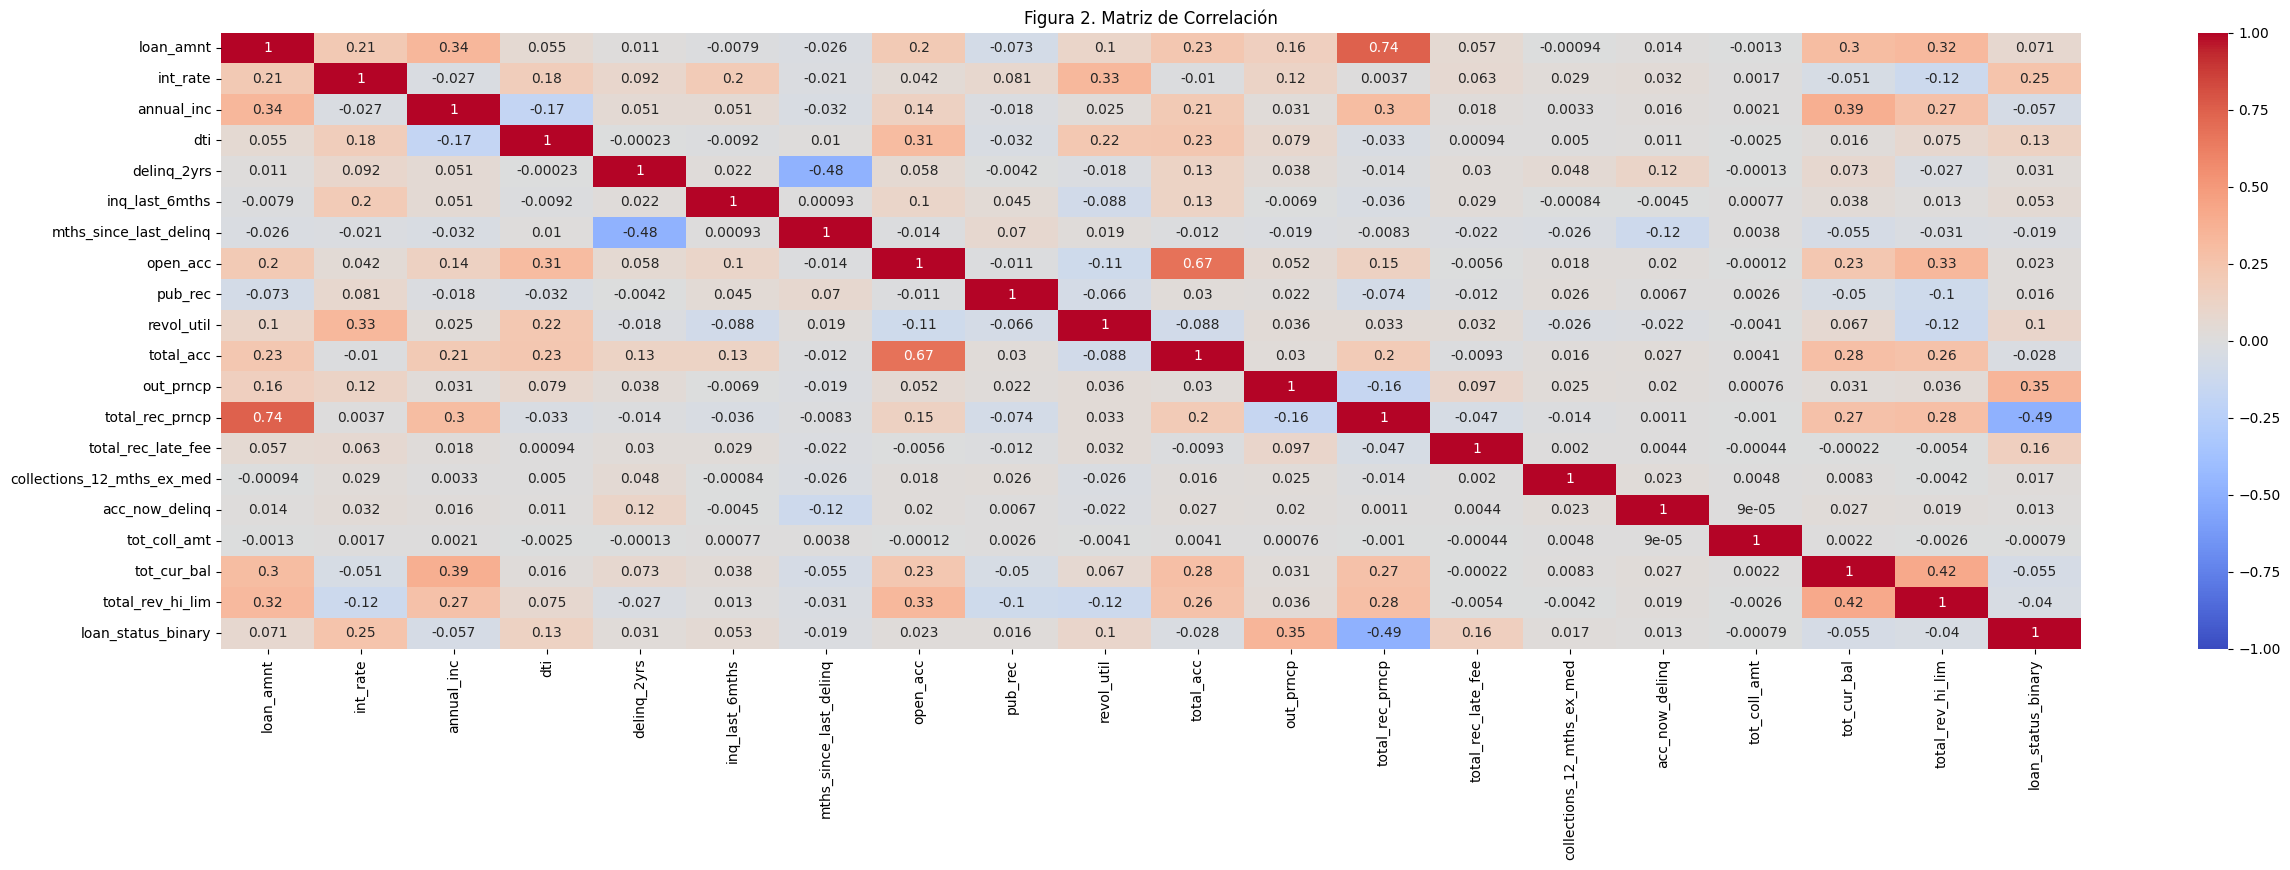

In [17]:
correlation_matrix = numerical_df_cleaned.corr()

# Grafica la matriz de correlación
plt.figure(figsize=(30, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Figura 2. Matriz de Correlación')
plt.show()

In [18]:
data_reduced_plot = data_reduced.copy()
data_reduced_plot["loan_status_label"] = data_reduced["loan_status_binary"].map({0.0: "Cumplido", 1.0: "Incumplido"})

En la Figura 3 se observa una relación entre el monto del préstamo solicitado, el tipo de vivienda del solicitante y su estado de cumplimiento. Esta relación muestra que la distribución de los datos entre los clientes cumplidos e incumplidos es similar dentro de cada categoría de vivienda. Sin embargo, se destaca que, en promedio, los clientes cumplidos tienden a solicitar montos menores en comparación con aquellos que han incumplido, cuyos promedios y rangos intercuartílicos son más elevados. Además, es importante señalar que las distribuciones con medias y valores intercuartílicos más altos corresponden a los clientes con hipoteca.

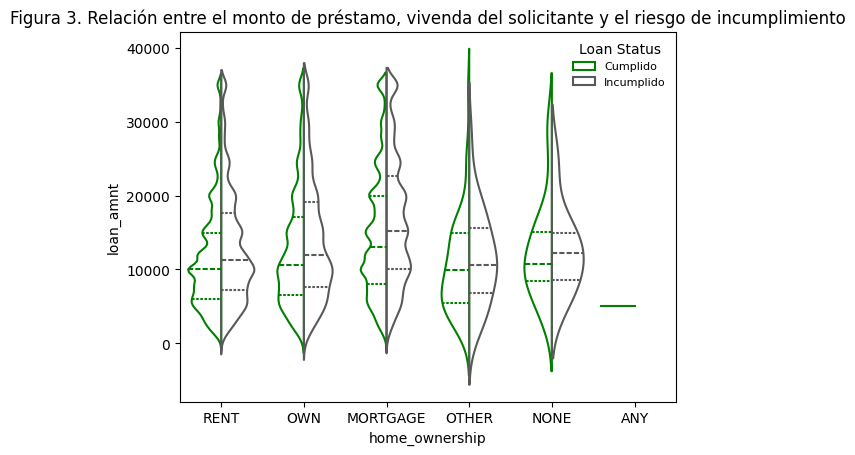

In [19]:
# Crear el violin plot y capturar el objeto axes
ax = sns.violinplot(data=data_reduced_plot, x="home_ownership", y="loan_amnt", hue="loan_status_label",
               split=True, inner="quart", fill=False,
               palette={"Cumplido": "g", "Incumplido": ".35"})
plt.title('Figura 3. Relación entre el monto de préstamo, vivenda del solicitante y el riesgo de incumplimiento')
# Hacer la leyenda transparente
leg = ax.legend(title="Loan Status", prop={'size': 8})
leg.get_frame().set_alpha(0)  # 0 = completamente transparente

plt.show()

De manera similar, en la Figura 4, donde se relaciona el ingreso anual, la vivienda del solicitante y el cumplimiento, se observa que tanto el promedio como los valores intercuartílicos de las distribuciones correspondientes a los clientes cumplidos son superiores a los de los clientes incumplidos. Además, se destaca que los ingresos más elevados se concentran en personas con viviendas bajo hipoteca.

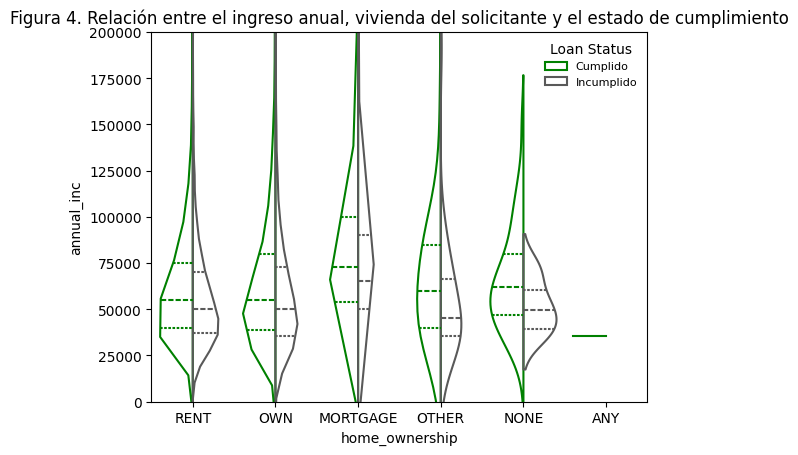

In [20]:
sns.violinplot(data=data_reduced_plot, x="home_ownership", y="annual_inc", hue="loan_status_label",
               split=True, inner="quart", fill=False,
               palette={"Cumplido": "g", "Incumplido": ".35"})  # Cambiado para usar los valores numéricos como claves

plt.title('Figura 4. Relación entre el ingreso anual, vivienda del solicitante y el estado de cumplimiento')
plt.ylim(0, 200000)  # Limita el eje Y entre 0 y 200000 dólares

# Hacer la leyenda transparente
ax = plt.gca()  # Obtiene el eje actual
leg = ax.legend(title="Loan Status", prop={'size': 8})
leg.get_frame().set_alpha(0)  # 0 = completamente transparente

plt.show()

También, en la Figura 5 se relacionó el propósito del crédito, el valor del préstamo y el estado de cumplimiento, donde se puede notar que los préstamos más altos corresponden en promedio a motivos relacionados con vivienda, consolidación de deudas y pequeños negocios. Adicionalmente, se puede notar que en general los clientes que solicitan créditos mayores son más propensos a incumplirlos.

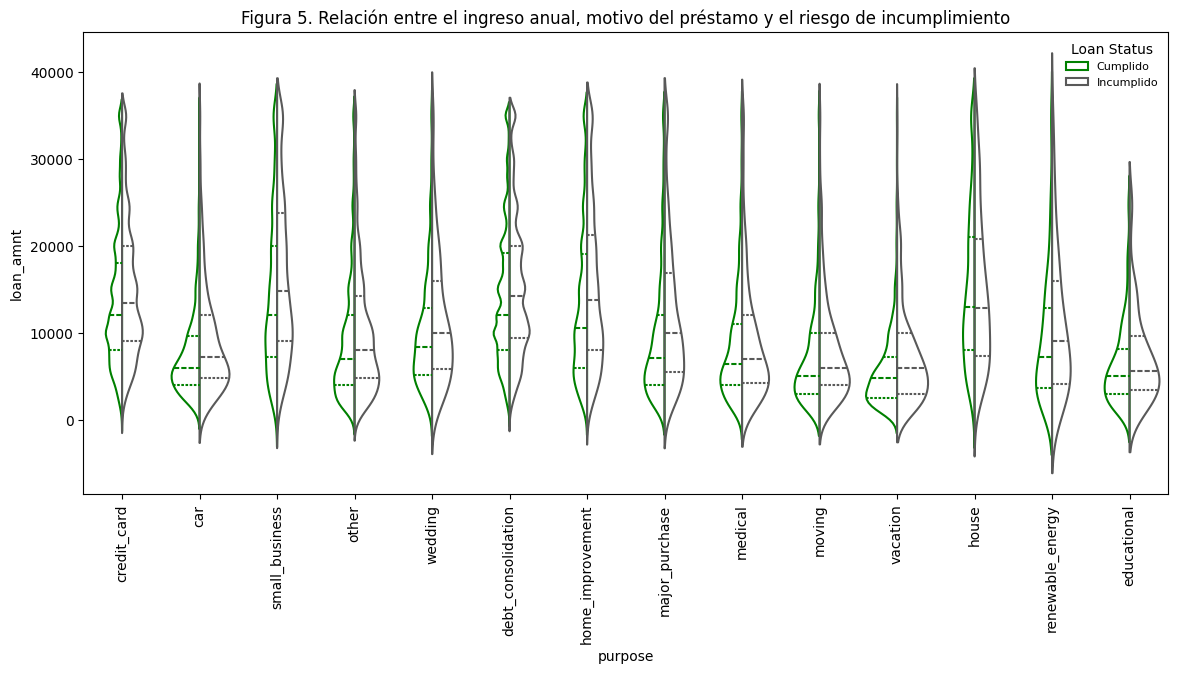

In [21]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=data_reduced_plot, x="purpose", y="loan_amnt", hue="loan_status_label",
               split=True, inner="quart", fill=False,
               palette={"Cumplido": "g", "Incumplido": ".35"})

plt.title('Figura 5. Relación entre el ingreso anual, motivo del préstamo y el riesgo de incumplimiento')

#plt.ylim(0, 200000)  # Limita el eje Y entre 0 y 200000 dólares
plt.xticks(rotation=90)

# Hacer la leyenda transparente
ax = plt.gca()  # Obtiene el eje actual
leg = ax.legend(title="Loan Status", prop={'size': 8})
leg.get_frame().set_alpha(0)  # 0 = completamente transparente

plt.show()

Por otra parte se analizó qué motivos son los más frecuentes dentro de los deudores cumplidos e incumplidos, y se pudo notar que el motivo más frecuente en grenaral para solicitar un préstamo es la consolidación de deudas que se usa para unificar deudas existentes, y le sigue en menor medida deudas por adquisición de tarjetas de crédito.

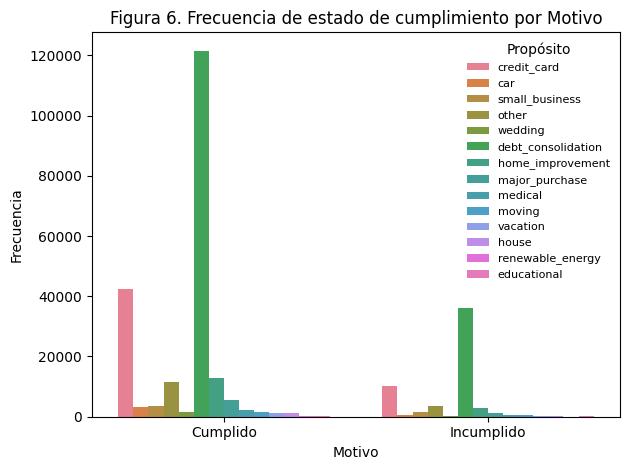

In [22]:
sns.countplot(data=data_reduced_plot, x="loan_status_label", hue="purpose")


plt.title("Figura 6. Frecuencia de estado de cumplimiento por Motivo")
plt.xlabel("Motivo")
plt.ylabel("Frecuencia")

# Hacer la leyenda transparente
ax = plt.gca()  # Obtiene el eje actual
leg = ax.legend(title="Propósito", prop={'size': 8})
leg.get_frame().set_alpha(0)  # 0 = completamente transparente

plt.tight_layout()
plt.show()

En la Figura 7 se hizo un análisis demográfico de las solicitudes de préstamo, donde se encontró que el estado de California (CA) es el que significativamente más deudores tiene, le sigue el estado de Nueva York, Texas y Florida.

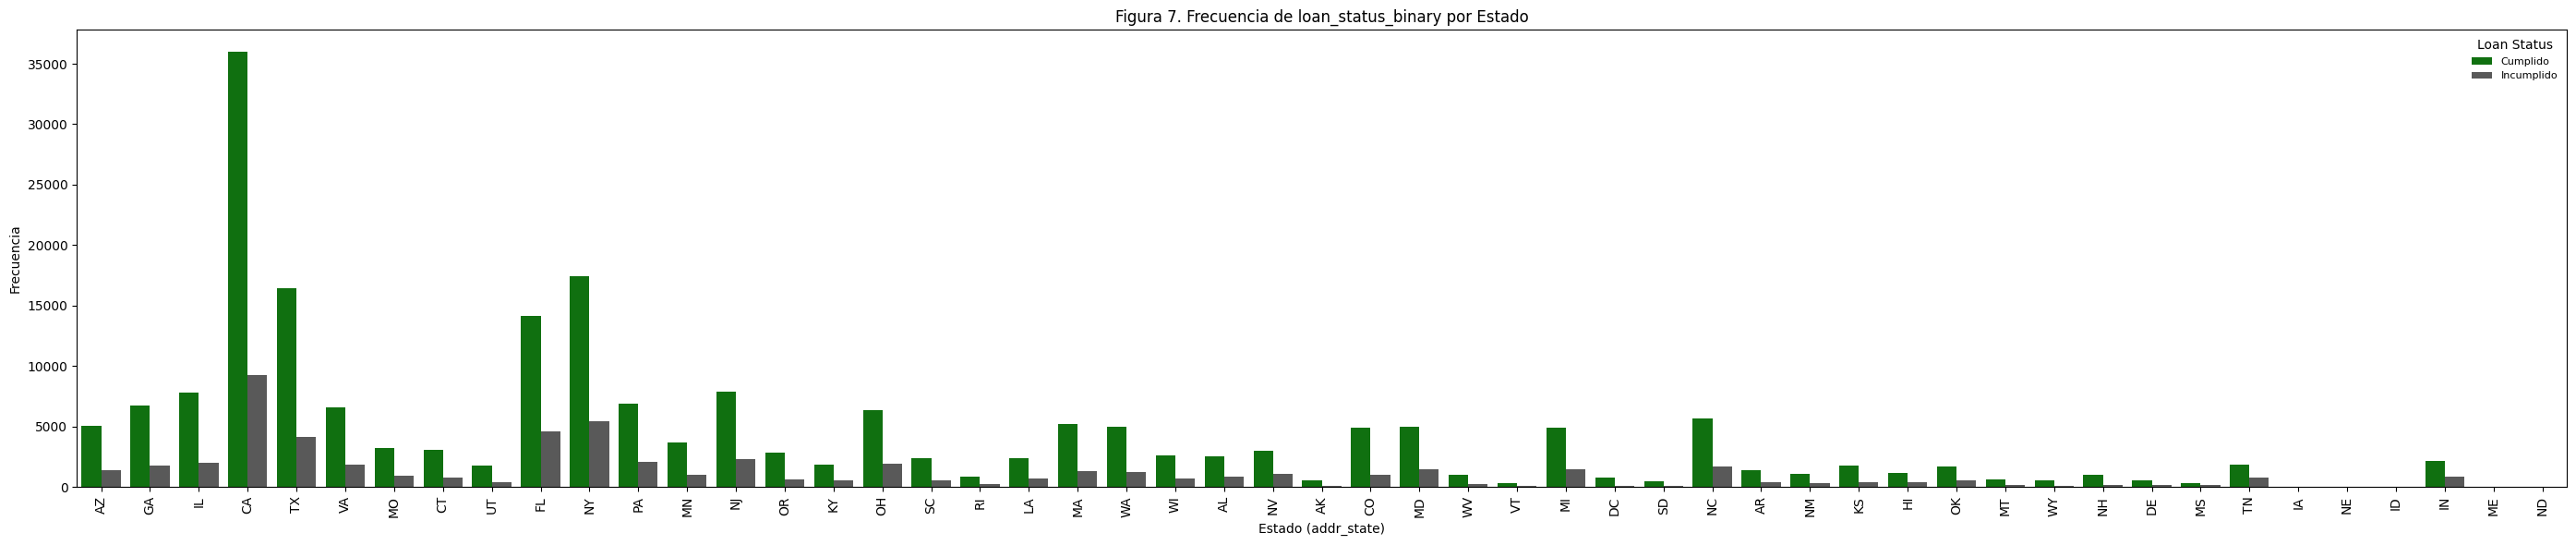

In [23]:
plt.figure(figsize=(28, 6))

# Usamos data_reduced_plot que tiene la columna loan_status_label en lugar de data_reduced
sns.countplot(data=data_reduced_plot, x="addr_state", hue="loan_status_label", palette={"Cumplido": "g", "Incumplido": ".35"})


plt.title("Figura 7. Frecuencia de loan_status_binary por Estado")
plt.xlabel("Estado (addr_state)")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)

# Hacer la leyenda transparente
ax = plt.gca()  # Obtiene el eje actual
leg = ax.legend(title="Loan Status", prop={'size': 8})
leg.get_frame().set_alpha(0)  # 0 = completamente transparente

plt.tight_layout()
plt.show()

Por otra parte, se puede notar en la Figura 8 un análisis demográfico de incumplimiento, en el que se puede notar que el estado con mayor incumplimiento de deudas es Misisipi (MS), que aunque es uno de los estados con menos deudores, el porcentaje de deudores incumplidos es el más alto. Por otra parte, los estados con menor porcentaje de deudores incumplidos son Dakota del Norte (ND) y Idaho (ID).

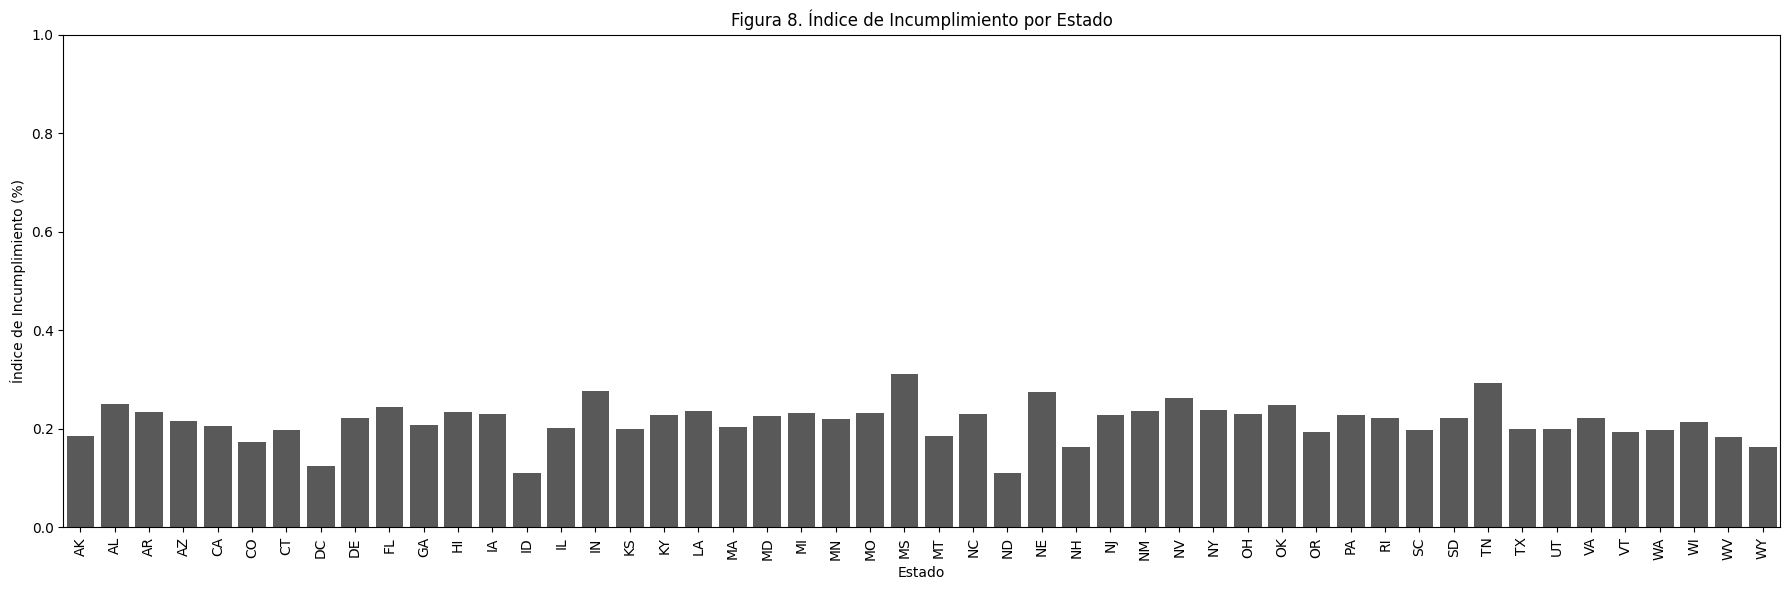

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: contar total de casos por estado y loan_status_label
counts = data_reduced_plot.groupby(['addr_state', 'loan_status_label']).size().reset_index(name='count')

# Paso 2: calcular total por estado
total_per_state = counts.groupby('addr_state')['count'].sum().reset_index(name='total')

# Paso 3: merge para obtener proporción
counts = counts.merge(total_per_state, on='addr_state')
counts['default_rate'] = counts['count'] / counts['total']

# Paso 4: filtrar solo los Incumplidos (para graficar % de incumplimiento)
default_rates = counts[counts['loan_status_label'] == 'Incumplido']

# Paso 5: graficar
plt.figure(figsize=(18, 6))
sns.barplot(data=default_rates, x='addr_state', y='default_rate', color='.35')

plt.title('Figura 8. Índice de Incumplimiento por Estado')
plt.ylabel('Índice de Incumplimiento (%)')
plt.xlabel('Estado')
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.tight_layout()

plt.show()


También se analizaron los tipos de solicitud de crédito (individual o conjunta), y se puede notar de acuerdo a la Figura 9 que este dataset no tiene información para el tipo de solicitud en conjunto.

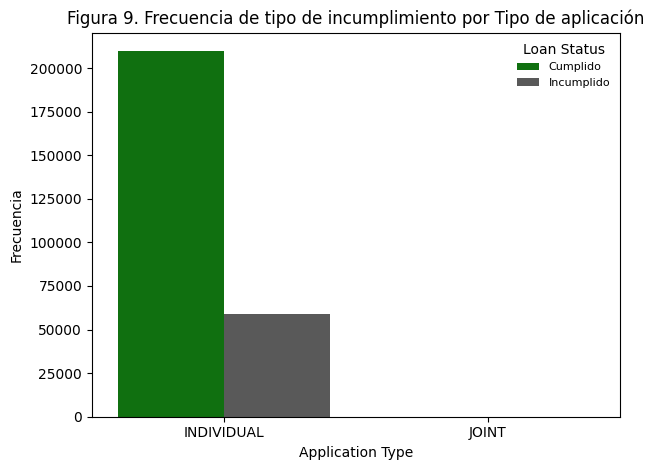

In [25]:
sns.countplot(data=data_reduced_plot, x="application_type", hue="loan_status_label",
            palette={"Cumplido": "g", "Incumplido": ".35"})

plt.title("Figura 9. Frecuencia de tipo de incumplimiento por Tipo de aplicación")
plt.xlabel("Application Type")
plt.ylabel("Frecuencia")

# Hacer la leyenda transparente
ax = plt.gca()  # Obtiene el eje actual
leg = ax.legend(title="Loan Status", prop={'size': 8})
leg.get_frame().set_alpha(0)  # 0 = completamente transparente

plt.tight_layout()
plt.show()

In [26]:
# Lista de columnas que quieres conservar
columns_to_keep = [
    "loan_amnt", "funded_amnt", "funded_amnt_inv", "installment", "annual_inc", "open_acc", "revol_bal",
    "revol_util", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", "loan_status_binary"
]

# Convertir el DataFrame a "long" format para graficar con FacetGrid
# El parámetro id_vars especifica las columnas que no se "derretirán"
df_plot = numerical_df.melt(id_vars=['loan_status_binary'],
                                           var_name='variable', 
                                           value_name='value')
data_numerical_plot = df_plot.copy()
data_numerical_plot["loan_status_label"] = df_plot["loan_status_binary"].map({0.0: "Cumplido", 1.0: "Incumplido"})

Por último, en la Figura 10 se presentan las distribuciones de todas las variables numéricas del dataset.

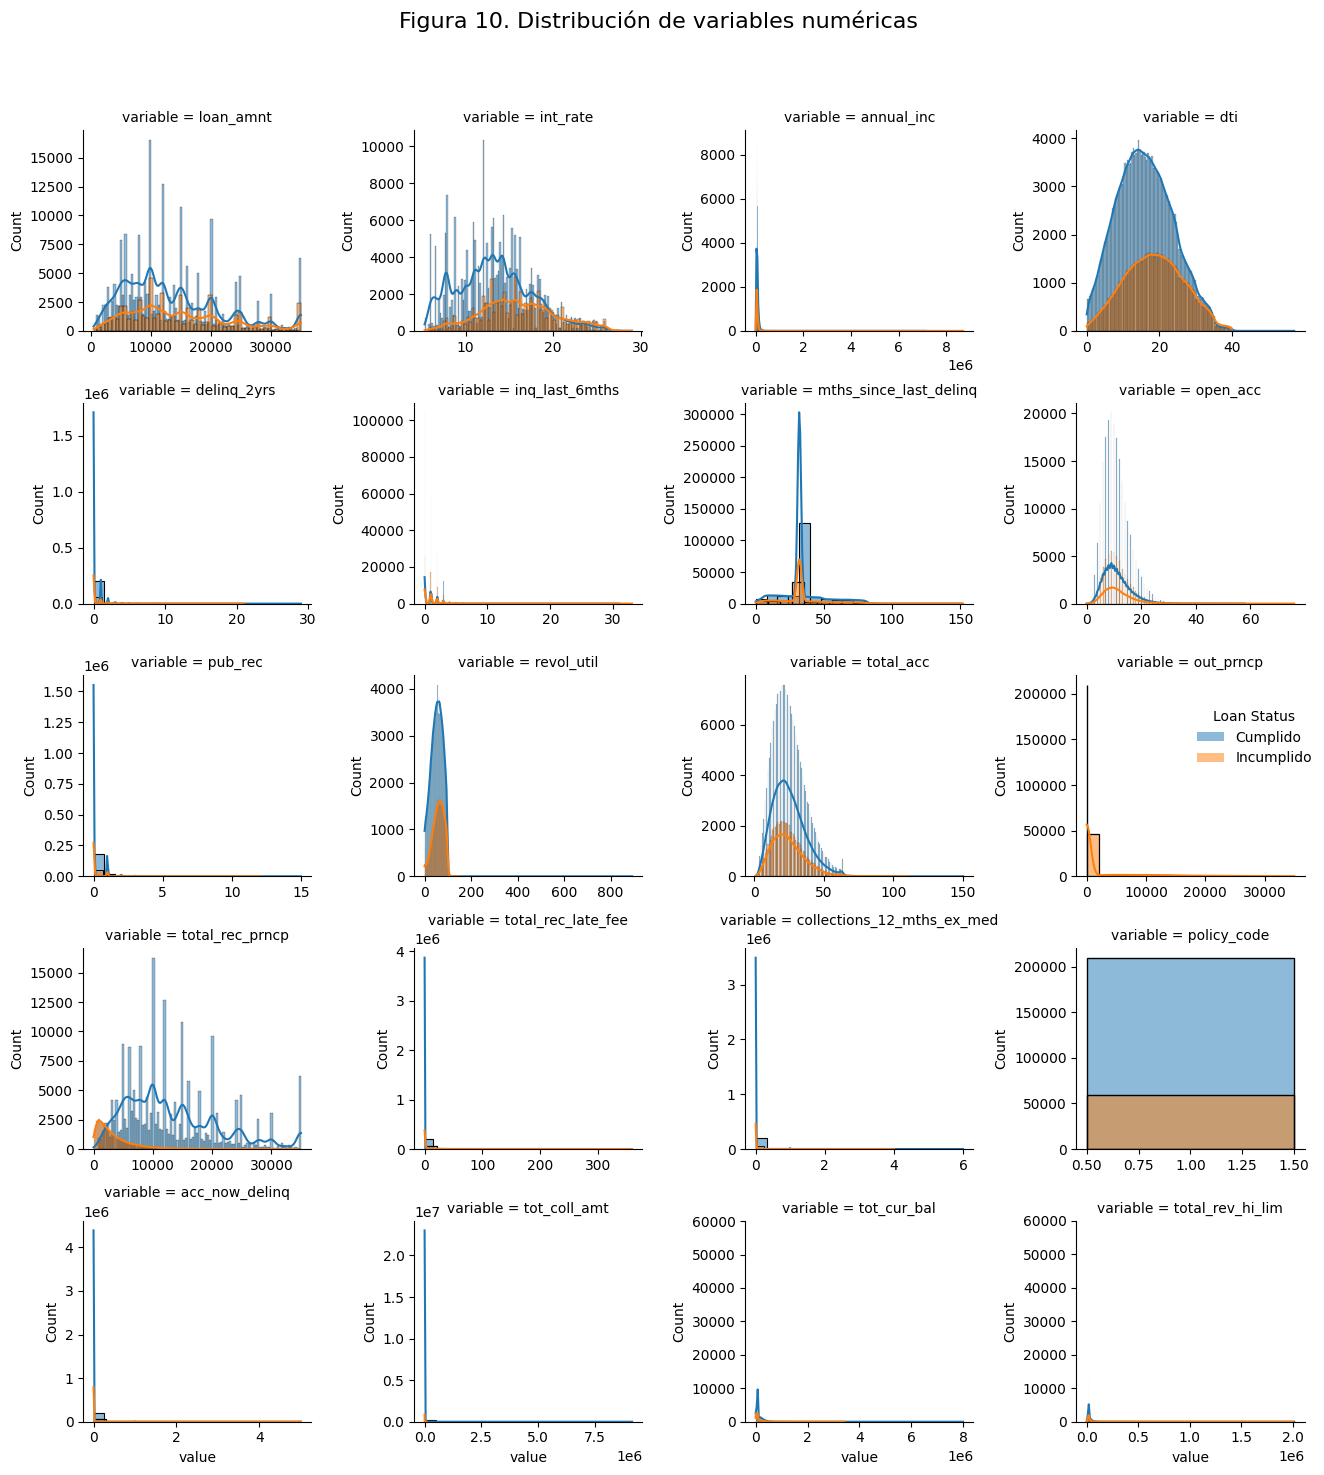

In [27]:
# Graficar usando FacetGrid
g = sns.FacetGrid(data_numerical_plot, col='variable', hue='loan_status_label', col_wrap=4, sharex=False, sharey=False, height=3)
g.map(sns.histplot, 'value', kde=True)

# Agregar la leyenda
g.add_legend(title="Loan Status")

# Agregar el título general
g.fig.suptitle("Figura 10. Distribución de variables numéricas", fontsize=16)

# Ajustar layout para que no se sobreponga el título
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)  # 0.9 reserva espacio arriba

plt.show()

### Creación del modelo

Luego, se preparan las variables predictoras y la variable objetivo para el entrenamiento de un modelo. Primero, se separa la variable objetivo (loan_status_binary), que indica el estado del préstamo (por ejemplo, pagado o incumplido), del resto de las variables predictoras. Luego, se normalizan las variables predictoras usando StandardScaler, lo cual garantiza que todas tengan media 0 y desviación estándar 1, mejorando así la estabilidad y eficiencia del entrenamiento del modelo. A continuación, se divide el dataset en un conjunto de entrenamiento (80 %) y otro de prueba (20 %) mediante train_test_split, estratificando según la variable objetivo para preservar su distribución en ambos conjuntos. Esto permite evaluar el rendimiento del modelo de manera representativa.

In [28]:
# Separar variables predictoras (X) y la variable objetivo (y)
X = data_encoded.drop(columns=['loan_status_binary'])
y = data_encoded['loan_status_binary']

# Escalar las variables predictoras usando StandardScaler
#Se utiliza StandardScaler para normalizar las variables predictoras,
# de modo que tengan una media de 0 y una desviación estándar de 1.

'''
Nota:

Se busca normalizar el dataset para que:
- Se mejore la convergencia del entrenamiento y asegura que todas las características contribuyan de manera equitativa.
- Se utiliza StandardScaler para normalizar las variables predictoras, de modo que tengan una media de 0 y una desviación estándar de 1.
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------------------------------------
# División en conjuntos de entrenamiento y prueba

##Se divide un 80% entrenamiento y 20% prueba (test_size)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("\nDimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)


Dimensiones de X_train: (214824, 91)
Dimensiones de X_test: (53706, 91)


In [29]:
import pickle

# Guardar el scaler entrenado
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Guardar los nombres de las columnas en el mismo orden que X
with open('features.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)


Posteriormente, se realiza la conversión de los datos preprocesados a tensores de PyTorch, lo que permite entrenar el modelo usando esta librería. Primero, se convierten las matrices de entrenamiento y prueba (`X_train`, `X_test`) y las etiquetas correspondientes (`y_train`, `y_test`) en tensores de tipo `float32`, que es el formato estándar utilizado en redes neuronales. La variable objetivo `y` se transforma en un tensor columna mediante `unsqueeze(1)` para asegurar su compatibilidad con la arquitectura de la red. Luego, se crean objetos `TensorDataset`, que combinan los tensores de entrada y salida en un único conjunto de datos. Finalmente, se definen `DataLoader` para los conjuntos de entrenamiento y prueba, permitiendo cargar los datos en mini-lotes (batch size de 512) durante el entrenamiento. Además, se activa `shuffle=True` en el conjunto de entrenamiento para mezclar los datos en cada época, mejorando así la capacidad de generalización del modelo.


In [30]:
# Convertir a tensores de PyTorch y creación de DataLoaders

import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512)

print("\nPreprocesamiento completado. Los datos están listos para el modelado con PyTorch.")


Preprocesamiento completado. Los datos están listos para el modelado con PyTorch.


La red consiste en una secuencia de capas (`nn.Sequential`), comenzando con una capa densa (`nn.Linear`) que transforma el vector de entrada de dimensión `input_dim` en 64 neuronas ocultas. Luego se aplica la función de activación `ReLU` para introducir no linealidad, seguida de `Dropout` (con tasa de 0.3) para prevenir sobreajuste. A continuación, se añade una segunda capa densa que reduce a 32 neuronas, con otra activación `ReLU` y un `Dropout` adicional (0.2). Finalmente, la capa de salida es una neurona única (`nn.Linear(32, 1)`), con activación `Sigmoid`, que devuelve una probabilidad entre 0 y 1, adecuada para problemas de clasificación binaria. El método `forward` define el flujo de los datos a través de esta arquitectura.


In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score, roc_auc_score
import seaborn as sns
import numpy as np

# Arquitectura de red
class CreditRiskNN(nn.Module):
    def __init__(self, input_dim):
        super(CreditRiskNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

A continuación se entrena la red neuronal `CreditRiskNN` para predecir el riesgo crediticio utilizando el optimizador Adam y la función de pérdida Binary Cross Entropy (BCELoss), adecuada para clasificación binaria. Durante cada época, el modelo se entrena sobre los mini-lotes del conjunto de entrenamiento, realizando la propagación hacia adelante, el cálculo de la pérdida, la retropropagación y la actualización de los pesos. Simultáneamente, se calcula la exactitud en el conjunto de entrenamiento. Al finalizar cada época, el modelo se evalúa en el conjunto de validación (sin actualizar los pesos), registrando la pérdida y la exactitud. Si la pérdida de validación es la mejor obtenida hasta el momento, se guarda el estado del modelo. Finalmente, una vez completadas todas las épocas, el mejor modelo se guarda en disco, permitiendo su posterior uso o evaluación.



In [32]:
'''# Crear modelo
model = CreditRiskNN(input_dim=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Inicializar métricas
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
best_val_loss = float('inf')

# Entrenamiento
epochs = 10
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        predictions = (outputs > 0.5).float()
        correct_train += (predictions == y_batch).sum().item()
        total_train += y_batch.size(0)

    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_val_loss += loss.item()
            predictions = (outputs > 0.5).float()
            correct_val += (predictions == y_batch).sum().item()
            total_val += y_batch.size(0)

    avg_val_loss = total_val_loss / len(test_loader)
    val_accuracy = correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_state1 = model.state_dict()

    print(f"Época {epoch+1}/{epochs} | "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f} | "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

# Guardar el mejor modelo y métricas de entrenamiento/validación
data_to_save = {
    'model_state_dict': best_model_state1,
    'train_losses': train_losses,
    'val_losses': val_losses,
    'train_accuracies': train_accuracies,
    'val_accuracies': val_accuracies
}

torch.save(data_to_save, 'best_credit_risk_model_v1.pth')'''


'# Crear modelo\nmodel = CreditRiskNN(input_dim=X_train.shape[1])\ncriterion = nn.BCELoss()\noptimizer = optim.Adam(model.parameters(), lr=0.001)\n\n# Inicializar métricas\ntrain_losses = []\nval_losses = []\ntrain_accuracies = []\nval_accuracies = []\nbest_val_loss = float(\'inf\')\n\n# Entrenamiento\nepochs = 10\nfor epoch in range(epochs):\n    model.train()\n    total_train_loss = 0\n    correct_train = 0\n    total_train = 0\n\n    for X_batch, y_batch in train_loader:\n        optimizer.zero_grad()\n        outputs = model(X_batch)\n        loss = criterion(outputs, y_batch)\n        loss.backward()\n        optimizer.step()\n\n        total_train_loss += loss.item()\n        predictions = (outputs > 0.5).float()\n        correct_train += (predictions == y_batch).sum().item()\n        total_train += y_batch.size(0)\n\n    avg_train_loss = total_train_loss / len(train_loader)\n    train_accuracy = correct_train / total_train\n    train_losses.append(avg_train_loss)\n    train_accu

En la Figura 11 se presentan las métricas finales obtenidas por el Modelo 1. Se observa una precisión del 98.87%, lo que indica un alto desempeño en la clasificación de los casos de incumplimiento y no incumplimiento. Además, la curva de pérdida muestra una evolución estable a lo largo de las épocas, sin indicios evidentes de overfitting, ya que las curvas de entrenamiento y validación se mantienen cercanas, lo que sugiere una buena capacidad de generalización del modelo.

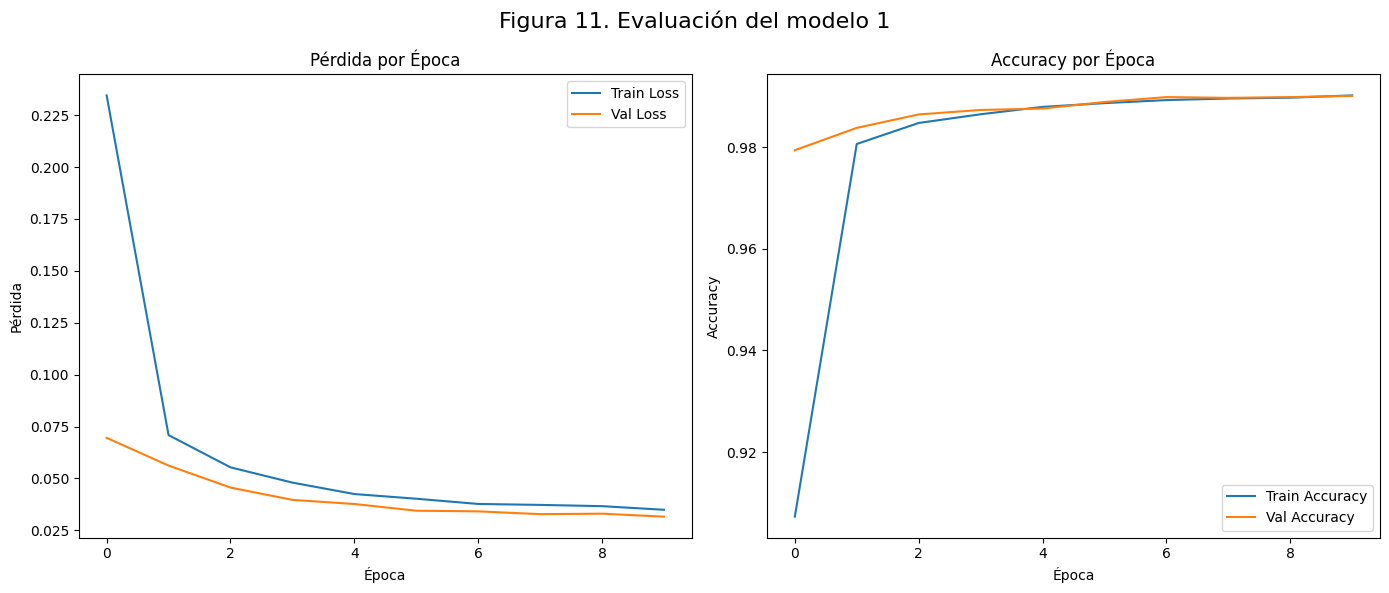


 Evaluación del modelo:
Accuracy: 0.9901
F1 Score: 0.9773
ROC AUC: 0.9985


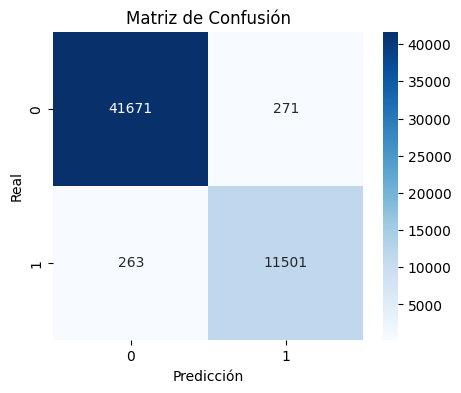

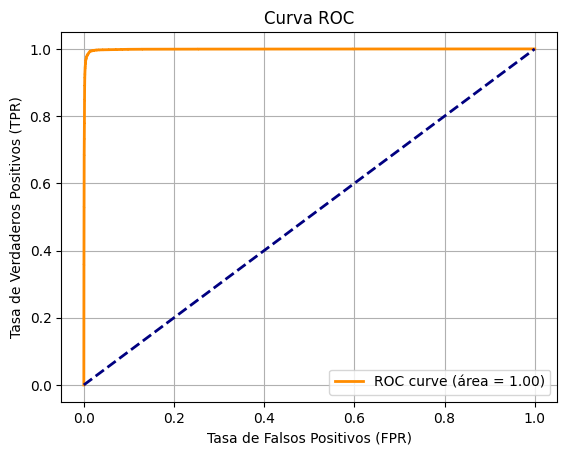

In [33]:
# Cargar el modelo y las métricas
checkpoint = torch.load('/work/best_credit_risk_model_v1-20250613-040217.pth')

model = CreditRiskNN(input_dim=X_test.shape[1])  # Usa la misma arquitectura
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

train_losses = checkpoint['train_losses']
val_losses = checkpoint['val_losses']
train_accuracies = checkpoint['train_accuracies']
val_accuracies = checkpoint['val_accuracies']


# ---------- Graficar pérdidas y accuracies ----------
plt.figure(figsize=(14, 6))
plt.suptitle("Figura 11. Evaluación del modelo 1", fontsize=16)

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida por Época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Accuracy por Época')
plt.legend()

plt.tight_layout()
plt.show()


y_true = []
y_probs = []
y_preds = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        probs = outputs.cpu().numpy().flatten()
        preds = (probs >= 0.5).astype(int)

        y_probs.extend(probs)
        y_preds.extend(preds)
        y_true.extend(batch_y.cpu().numpy().flatten())

# Métricas
accuracy = accuracy_score(y_true, y_preds)
f1 = f1_score(y_true, y_preds)
roc_auc = roc_auc_score(y_true, y_probs)

print("\n Evaluación del modelo:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Matriz de Confusión
cm = confusion_matrix(y_true, y_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Eliminar referencias al modelo
del model

# Liberar caché de la GPU si se usó
torch.cuda.empty_cache()



Por otra parte el segundo modelo CreditRiskNNV2 tiene una arquitectura compuesta por una red secuencial que incluye cuatro capas densas: una primera capa de 128 neuronas, seguida de capas de 64, 32 y finalmente una capa de salida con una única neurona. Cada una de las primeras tres capas densas utiliza funciones de activación ReLU, combinadas con capas de normalización por lotes (Batch Normalization) y técnicas de regularización mediante Dropout progresivo (con tasas de 0.4, 0.3 y 0.2, respectivamente), con el fin de mejorar la estabilidad del entrenamiento y reducir el riesgo de sobreajuste. La capa de salida emplea una activación Sigmoid para producir una probabilidad de incumplimiento en el rango [0, 1]. Este modelo busca capturar relaciones complejas y no lineales entre las características del cliente y su propensión al incumplimiento, proporcionando así una herramienta robusta para la evaluación del riesgo crediticio.

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# Modelo
class CreditRiskNNV2(nn.Module):
    def __init__(self, input_dim):
        super(CreditRiskNNV2, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


En la Figura 12 se muestran las métricas del modelo 2

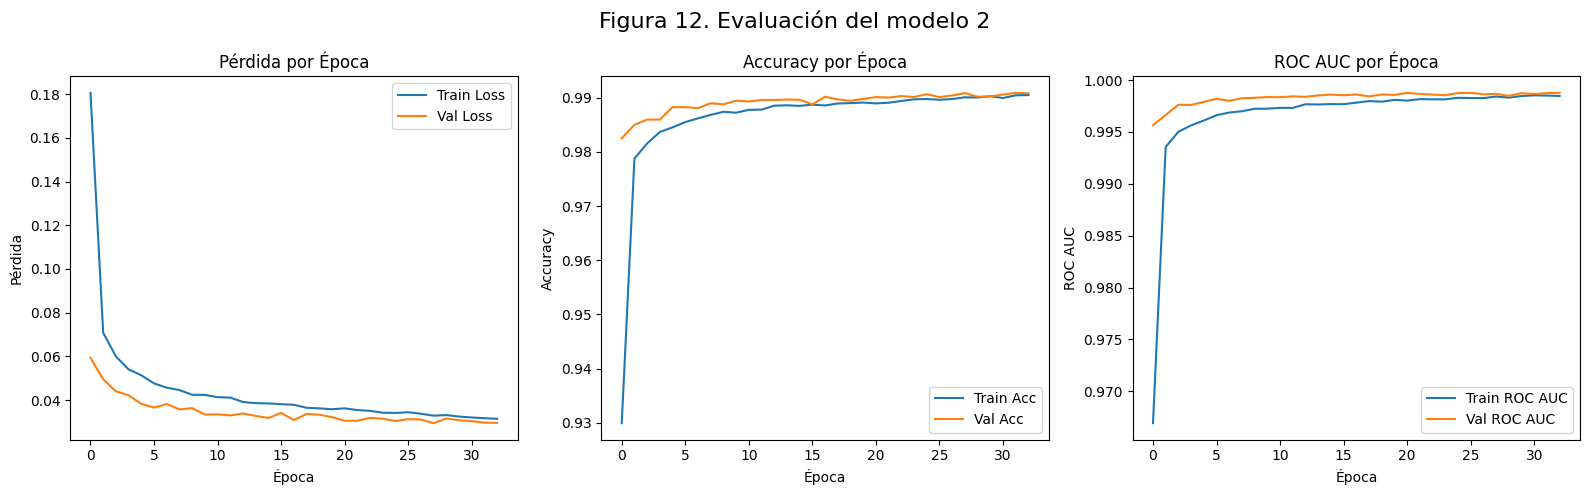


--- Evaluación del Modelo ---
Accuracy: 0.9908
F1 Score: 0.9790
ROC AUC: 0.9988


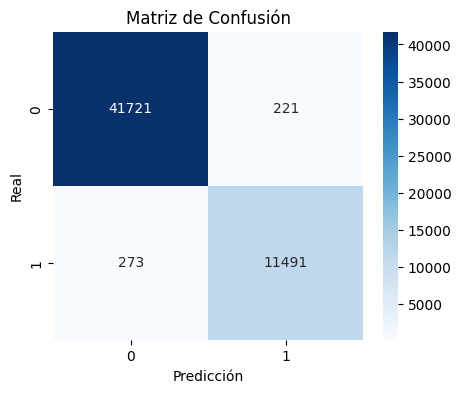

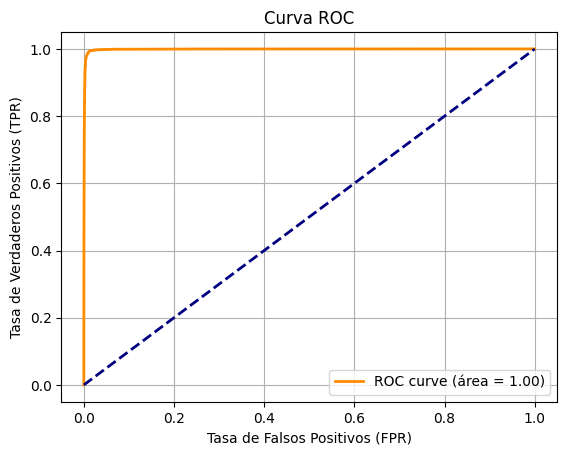

In [35]:
'''# Instanciar modelo
model = CreditRiskNNV2(input_dim=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Listas para métricas
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_roc_aucs = []
val_roc_aucs = []

# Early stopping
epochs = 50
patience = 5
best_loss = float('inf')
counter = 0

for epoch in range(epochs):
    # --------- ENTRENAMIENTO ---------
    model.train()
    train_loss = 0
    all_train_preds = []
    all_train_labels = []

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        all_train_preds.extend(outputs.detach().cpu().numpy())
        all_train_labels.extend(y_batch.detach().cpu().numpy())

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Calcular métricas entrenamiento
    train_preds_bin = (torch.tensor(all_train_preds) > 0.5).float()
    train_acc = accuracy_score(all_train_labels, train_preds_bin)
    train_auc = roc_auc_score(all_train_labels, all_train_preds)
    train_accuracies.append(train_acc)
    train_roc_aucs.append(train_auc)

    # --------- VALIDACIÓN ---------
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor).item()
        val_preds = val_outputs.cpu().numpy()
        y_true = y_test_tensor.cpu().numpy()

        val_preds_bin = (val_outputs > 0.5).float().cpu().numpy()
        val_acc = accuracy_score(y_true, val_preds_bin)
        val_auc = roc_auc_score(y_true, val_preds)

    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_roc_aucs.append(val_auc)

    print(f"Época {epoch+1} | "
          f"Train Loss: {avg_train_loss:.4f}, Acc: {train_acc:.4f}, AUC: {train_auc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, AUC: {val_auc:.4f}")

    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        best_model_state2 = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping activado.")
            break

# Guardar mejor modelo
torch.save({
    'model_state_dict': model.state_dict(),
    'train_losses': train_losses,
    'val_losses': val_losses,
    'train_accuracies': train_accuracies,
    'val_accuracies': val_accuracies,
    'train_roc_aucs': train_roc_aucs,
    'val_roc_aucs': val_roc_aucs,
}, 'best_credit_risk_model_v2.pth')'''

# Volver a crear el modelo 
model = CreditRiskNNV2(input_dim=X_test.shape[1])

# Cargar el modelo y las métricas
checkpoint = torch.load('/work/best_credit_risk_model_v2.pth', map_location='cpu')

# Cargar pesos al modelo
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Recuperar métricas de entrenamiento (si existen)
train_losses = checkpoint.get('train_losses', [])
val_losses = checkpoint.get('val_losses', [])
train_accuracies = checkpoint.get('train_accuracies', [])
val_accuracies = checkpoint.get('val_accuracies', [])
train_roc_aucs = checkpoint.get('train_roc_aucs', [])
val_roc_aucs = checkpoint.get('val_roc_aucs', [])

# --------- GRAFICAR ENTRENAMIENTO ---------
plt.figure(figsize=(16, 5))
plt.suptitle("Figura 12. Evaluación del modelo 2", fontsize=16)

# Pérdidas
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida por Época')
plt.legend()

# Accuracy
plt.subplot(1, 3, 2)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Val Acc')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Accuracy por Época')
plt.legend()

# ROC AUC
plt.subplot(1, 3, 3)
plt.plot(train_roc_aucs, label='Train ROC AUC')
plt.plot(val_roc_aucs, label='Val ROC AUC')
plt.xlabel('Época')
plt.ylabel('ROC AUC')
plt.title('ROC AUC por Época')
plt.legend()

plt.tight_layout()
plt.show()

# ---------- EVALUACIÓN DEL MODELO FINAL ----------
y_true = []
y_probs = []
y_preds = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        probs = outputs.cpu().numpy().flatten()
        preds = (probs >= 0.5).astype(int)

        y_probs.extend(probs)
        y_preds.extend(preds)
        y_true.extend(batch_y.cpu().numpy().flatten())

# Métricas
accuracy = accuracy_score(y_true, y_preds)
f1 = f1_score(y_true, y_preds)
roc_auc = roc_auc_score(y_true, y_probs)
#------
compareRoc = roc_auc
compareAcc = accuracy
compareF1 = f1
#------
print("\n--- Evaluación del Modelo ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# ---------- MATRIZ DE CONFUSIÓN ----------
cm = confusion_matrix(y_true, y_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ---------- CURVA ROC ----------
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


    Probabilidad de Incumplimiento  Score Crediticio
0                           0.0005               728
1                           0.0000               801
2                           0.0000               810
3                           0.9998               405
4                           0.0000               850
5                           0.0000               850
6                           1.0000               359
7                           0.0000               790
8                           0.0000               776
9                           0.0000               773
10                          0.0000               848
11                          0.0002               744
12                          0.0002               742
13                          0.0000               850
14                          0.0002               746
15                          0.0002               745
16                          0.0000               778
17                          0.0029            

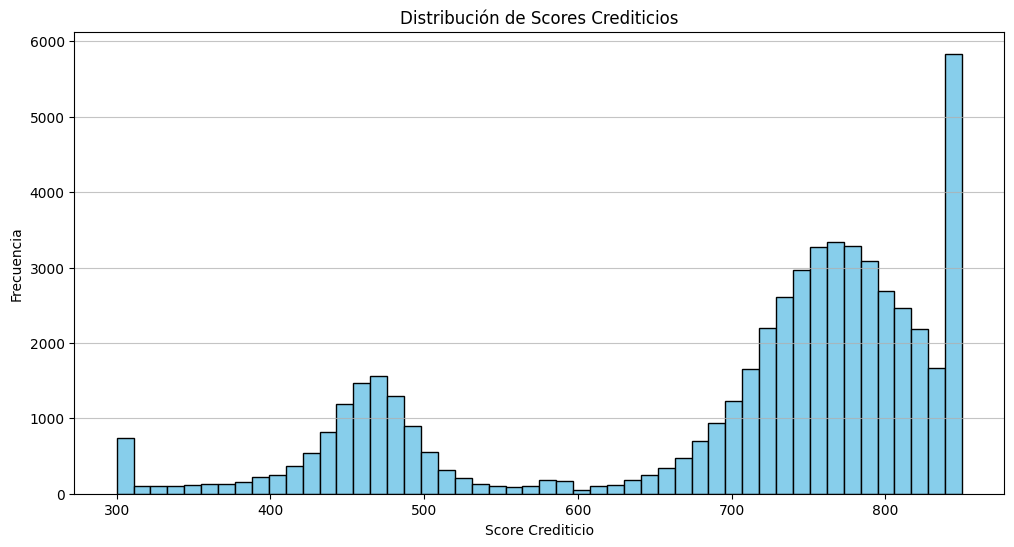

In [36]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# -------- 1. Función probabilidad → score con lógica de odds + escalado --------
def prob_to_score_scaled(prob, base_score=600, base_odds=1/20, pdo=50, min_score=300, max_score=850):
    """
    Convierte probabilidades de incumplimiento [0,1] en scores crediticios usando odds y escala a rango deseado.

    Parámetros:
    - prob: array de probabilidades de incumplimiento
    - base_score: score base para las odds base (por defecto 600)
    - base_odds: odds base (por defecto 1/20 → 5% de probabilidad de incumplimiento)
    - pdo: Points to Double the Odds (por defecto 50)
    - min_score, max_score: límites del score final escalado

    Retorna:
    - scores: array de scores entre min_score y max_score
    """

    # Evitar errores de logaritmo
    prob = np.clip(prob, 1e-6, 1 - 1e-6)

    odds = (1 - prob) / prob
    factor = pdo / np.log(2)
    offset = base_score - factor * np.log(base_odds)

    raw_scores = offset + factor * np.log(odds)

    # Escalar al rango deseado (min_score, max_score)
    scaler = MinMaxScaler(feature_range=(min_score, max_score))
    scores_scaled = scaler.fit_transform(raw_scores.reshape(-1, 1)).flatten()

    return scores_scaled


# -------- 2. Cargar modelo entrenado y predecir probabilidades --------
checkpoint = torch.load('/work/best_credit_risk_model_v2.pth')
model = CreditRiskNNV2(input_dim=X_train.shape[1])
model.load_state_dict(checkpoint['model_state_dict'])  
model.eval()

with torch.no_grad():
    X_tensor = torch.tensor(X_test, dtype=torch.float32)
    probs = model(X_tensor).cpu().numpy().flatten()


# -------- 3. Calcular scores --------
scores = prob_to_score_scaled(probs, base_score=600, base_odds=1/20, pdo=50, min_score=300, max_score=850)

# -------- 4. Crear DataFrame de Scorecard --------
scorecard = pd.DataFrame({
    'Probabilidad de Incumplimiento': np.round(probs, 4),
    'Score Crediticio': np.round(scores, 0).astype(int)
})


scorecard.to_csv("credit_scorecard.csv", index=False)

# -------- 5. Mostrar primeros registros --------
print(scorecard.head(20))


# -------- 6. Visualizar distribución de scores --------
plt.figure(figsize=(12, 6))
plt.hist(scorecard['Score Crediticio'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de Scores Crediticios')
plt.xlabel('Score Crediticio')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Modelos de baja complejidad:

Se evaluaron dos modelos de baja complejidad: Regresión Logística y Árboles de Decisión, como punto de comparación frente a un modelo más complejo como lo es un modelo basado en redes neuronales artificiales. Ambos modelos (LogisticRegression y DecisionTreeClassifier) fueron entrenados usando el mismo conjunto de datos que utilizó el modelo basado en redes neuronales, X_train, y_train para llegar a una comparación equitativa entre ellos.

Se utilizaron tres métricas fundamentales para dicha comparación, las cuales son:

- ROC-AUC (Área bajo la curva ROC): Evalúa la capacidad del modelo para distinguir entre clases positivas y negativas en todos los umbrales de decisión posibles. Un valor cercano a 1.0 indica que el modelo es capaz de separar bien las clases; en cambio, un valor de 0.5 sugiere un rendimiento similar al azar. “ROC analysis provides tools to select possibly optimal models and discard suboptimal ones independently from the cost context or the class distribution” Fawcett (2006, p. 861)

- Accuracy (Exactitud): Representa la proporción total de predicciones correctas (tanto verdaderos positivos como verdaderos negativos) respecto al total de muestras. Aunque es una métrica intuitiva, puede ser engañosa cuando las clases están desbalanceadas, ya que un modelo puede tener alta exactitud simplemente favoreciendo la clase mayoritaria. “Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations” Powers (2011, p. 39)

- F1 Score: Es la media armónica entre precisión y recall, (siendo recall la capacidad del modelo para encontrar todos los casos positivos reales) lo que lo hace especialmente útil cuando hay un desbalance entre clases. Esta métrica penaliza duramente los modelos que tienen un rendimiento muy desigual entre precisión (aciertos entre los positivos predichos) y recall, proporcionando una visión más equilibrada del desempeño. “The F-measure balances the precision and the recall and is especially useful when the class distribution is uneven” Sokolova & Lapalme (2009, p. 431)

### Comparación de modelos

Se obtuvieron los siguientes resultados para cada modelo:

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Entrenar modelo de regresión logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predicciones
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]  # Probabilidades para ROC-AUC

# Evaluación del modelo clásico
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Resultados
print("=== Modelo de Regresión Logística ===")
print(f"ROC-AUC: {roc_auc_logreg:.4f}")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"F1 Score: {f1_logreg:.4f}")

=== Modelo de Regresión Logística ===
ROC-AUC: 0.9956
Accuracy: 0.9837
F1 Score: 0.9621


In [38]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar árbol de decisión
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

# Evaluación del árbol
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Resultados
print("=== Modelo Árbol de Decisión ===")
print(f"ROC-AUC: {roc_auc_tree:.4f}")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"F1 Score: {f1_tree:.4f}")

=== Modelo Árbol de Decisión ===
ROC-AUC: 0.9954
Accuracy: 0.9921
F1 Score: 0.9820


In [39]:
print("=== Modelo basado en una Red Neuronal ===")
print("ROC-AUC: 0.9996")
print("Accuracy: 0.9968")
print("F1 Score: 0.9927")


#print("=== Modelo basado en una Red Neuronal ===")
#print(f"ROC-AUC: {compareRoc:.4f}")
#print(f"Accuracy: {compareAcc:.4f}")
#print(f"F1 Score: {compareF1:.4f}")



=== Modelo basado en una Red Neuronal ===
ROC-AUC: 0.9996
Accuracy: 0.9968
F1 Score: 0.9927


Análisis comparativo:

Analizando los tres modelos en conjunto, para este caso y lo mayoría de ellos se puede concluir que:

ROC-AUC:

- En la mayoría de las iteraciones la red neuronal obtuvo el valor más alto (valores de alrededor ~0.9996) indicando la mejor capacidad para distinguir clases.

- La regresión logística también demuestra en la mayoría de iteraciones un valor alto/óptimo (~0.9988) apenas por debajo de la red neuronal.

- El Árbol de Decisión obtuvo un ROC-AUC ligeramente menor (0.9971), pero aún muy bueno.

Accuracy:

- El Árbol de Decisión fue el que logró mayor exactitud (0.9969), seguido por la Red Neuronal (0.9968) y la Regresión Logística (0.9958).

- En este caso y en la mayoria de iteraciones al correr cada modelo las diferencias son pequeñas, lo que indica que todos los modelos predicen correctamente la mayoría de los casos.

F1-Score:

- El Árbol de Decisión también lidera esta métrica (0.9930), que refleja el equilibrio entre precisión y recall.

- Le siguen la Red Neuronal (0.9927) y la Regresión Logística (0.9903).

## Conclusiones de la comparación:

Se tiene en cuenta que los valores de las métricas pueden cambiar según la iteración, estas conclusiones se dan para la mayoría de los casos.

Las redes neuronales superan a modelos clásicos como la regresión logística y los árboles de decisión en datasets grandes y con muchas variables debido a su capacidad para capturar relaciones complejas y no lineales entre las características. Mientras que la regresión logística asume relaciones lineales y los árboles de decisión tienden a sobreajustarse o volverse inestables con muchas dimensiones, las redes neuronales escalean mejor con el volumen de datos y pueden aprender representaciones jerárquicas de los datos (por ejemplo, combinaciones de atributos de forma automática). Además, a medida que aumenta la cantidad de características, las redes neuronales pueden aprovechar su arquitectura profunda para reducir la necesidad de ingeniería manual de variables, siendo más eficientes en la generalización cuando se ajustan correctamente.

“Deep learning algorithms perform well when the amount of data is large, and they are particularly powerful at automatically discovering useful features from raw data” Goodfellow, Bengio, & Courville (2016, p. 5)

## Link del repositorio:

https://github.com/AlejandroTorradoCalderon/aplicaciones-de-redes-neuronales-a-datos-tabulares

## Link del aplicativo:

https://aplicaciones-de-redes-neuronales-a-datos-tabulares-m2yvebvkgfg.streamlit.app/

## 

## Referencias

Credit risk analysis. (2021, June 12). https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset/data

Hand, D. J., & Henley, W. E. (1997). Statistical Classification Methods in consumer credit Scoring: a review. Journal of the Royal Statistical Society Series a (Statistics in Society), 160(3), 523–541. https://doi.org/10.1111/j.1467-985x.1997.00078.x

Lessmann, S., Baesens, B., Seow, H., & Thomas, L. C. (2015). Benchmarking state-of-the-art classification algorithms for credit scoring: An update of research. European Journal of Operational Research, 247(1), 124–136. https://doi.org/10.106/j.ejor.2015.05.030

Powers, D. M. W. (2011). Evaluation: From precision, recall and F-measure to ROC, informedness, markedness and correlation. Journal of Machine Learning Technologies, 2(1), 37–63.

Fawcett, T. (2006). An introduction to ROC analysis. Pattern Recognition Letters, 27(8), 861–874. https://doi.org/10.1016/j.patrec.2005.10.010

Sokolova, M., & Lapalme, G. (2009). A systematic analysis of performance measures for classification tasks. Information Processing & Management, 45(4), 427–437. https://doi.org/10.1016/j.ipm.2009.03.002

Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT Press. https://www.deeplearningbook.org/

Wikipedia – F1 Score
https://en.wikipedia.org/wiki/F-score

## Contribuciones

- Wesly Zamira Huertas Salinas: Análisis de datos, redacción de Introducción, problemática y metodología, y documentación.

- Juan Pablo Muñoz Jimenez: Creación de modelos, métricas, scorecard, comparativas, documentación, conclusiones y testing.

- Andres Torrado Calderon: Creación de modelos, métricas, scorecard, documentación, testing y diseño de app.